<a href="https://colab.research.google.com/github/vasanth6382/Machine_learning/blob/main/Blended_Fuel_Demand_Forescasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,Input
import matplotlib.pyplot as plt

# LOAD THE DATASET

In [ ]:
import zipfile
import os

# Unzip the uploaded file
zip_path = '/content/Ethanol_Demand_Brazil_dataset.zip'
extract_path = '/content/ethanol_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted files
extracted_files = os.listdir(extract_path)

# Initialize an empty list to hold the data
data_frames = []

# Read each Excel file and append to the list
for file in extracted_files:
    if file.endswith('.xlsx'):
        file_path = os.path.join(extract_path, file)
        df = pd.read_excel(file_path)
        data_frames.append(df)

In [ ]:
# Concatenate all data frames
consolidated_data = pd.concat(data_frames, ignore_index=True)


In [ ]:
# Display the first few rows of the consolidated data
print(consolidated_data.head())

              Estados  Cana-de-açúcar (mil toneladas)  Açúcar (mil toneladas)  \
0      Espírito Santo                        3292.724                  58.635   
1               Goiás                        9922.493                 577.067   
2         Mato Grosso                       12384.480                 546.153   
3  Mato Grosso do Sul                        8247.056                 373.715   
4        Minas Gerais                       15599.511                1093.233   

   Etanol (mil m³)_Anidro  Etanol (mil m³)_Hidratado  Etanol (mil m³)_Total  \
0                 121.204                     81.355                202.559   
1                 256.217                    198.907                455.124   
2                 323.526                    330.393                653.919   
3                 203.345                    214.707                418.052   
4                 331.871                    303.945                635.816   

   Cana-de-açúcar(mil toneladas)  Açúc

In [ ]:
import pandas as pd

# Convert to DataFrame
consolidated_new_data= pd.DataFrame(consolidated_data)

# Rename columns to English
consolidated_new_data.rename(columns={
    'Estados': 'State',
    'Cana-de-açúcar(mil toneladas)': 'Sugarcane (thousand tons)',
    'Açúcar(mil toneladas)': 'Sugar (thousand tons)',
    'Etanol (mil m³)_Anidro': 'Ethanol (thousand m³) - Anhydrous',
    'Etanol (mil m³)_Hidratado': 'Ethanol (thousand m³) - Hydrous',
    'Etanol (mil m³)_Total': 'Ethanol (thousand m³) - Total',
    'Cana-de-açúcar (mil toneladas)': 'Sugarcane (thousand tons) - Historical',
    'Açúcar (mil toneladas)': 'Sugar (thousand tons) - Historical',
    'ESTADO/SAFRA': 'State/Season',
}, inplace=True)

# Display the DataFrame with renamed columns
print(consolidated_new_data.head())

                State  Sugarcane (thousand tons) - Historical  \
0      Espírito Santo                                3292.724   
1               Goiás                                9922.493   
2         Mato Grosso                               12384.480   
3  Mato Grosso do Sul                                8247.056   
4        Minas Gerais                               15599.511   

   Sugar (thousand tons) - Historical  Ethanol (thousand m³) - Anhydrous  \
0                              58.635                            121.204   
1                             577.067                            256.217   
2                             546.153                            323.526   
3                             373.715                            203.345   
4                            1093.233                            331.871   

   Ethanol (thousand m³) - Hydrous  Ethanol (thousand m³) - Total  \
0                           81.355                        202.559   
1             

In [ ]:
consolidated_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   State                                   580 non-null    object 
 1   Sugarcane (thousand tons) - Historical  29 non-null     float64
 2   Sugar (thousand tons) - Historical      29 non-null     float64
 3   Ethanol (thousand m³) - Anhydrous       580 non-null    float64
 4   Ethanol (thousand m³) - Hydrous         580 non-null    float64
 5   Ethanol (thousand m³) - Total           580 non-null    float64
 6   Sugarcane (thousand tons)               551 non-null    float64
 7   Sugar (thousand tons)                   551 non-null    float64
 8   State/Season                            60 non-null     object 
 9   2002                                    60 non-null     float64
 10  2003                                    60 non-null     float6

In [ ]:
consolidated_new_data.describe()

,Sugarcane (thousand tons) - Historical,Sugar (thousand tons) - Historical,Ethanol (thousand m³) - Anhydrous,Ethanol (thousand m³) - Hydrous,Ethanol (thousand m³) - Total,Sugarcane (thousand tons),Sugar (thousand tons),2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,29.000000,29.000000,580.000000,580.000000,580.000000,5.510000e+02,551.000000,6.000000e+01,6.000000e+01,6.000000e+01,...,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01
mean,33170.697517,2334.544138,1020.934081,1712.341183,2754.399347,7.375625e+04,3494.702303,5.153530e+05,5.374118e+05,5.632721e+05,...,1.019410e+06,1.043698e+06,1.014560e+06,1.023330e+06,1.021123e+06,1.005297e+06,6.830051e+05,6.813016e+05,6.840785e+05,6.855798e+05
std,81402.246545,5775.131567,2666.801060,4832.101594,7326.914749,3.908783e+05,8960.222519,1.218277e+06,1.277374e+06,1.341077e+06,...,2.512830e+06,2.580871e+06,2.528423e+06,2.555442e+06,2.564293e+06,2.528183e+06,1.970395e+06,1.966272e+06,1.970682e+06,1.973373e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,8.500000e+01,9.300000e+01,9.300000e+01,...,1.330000e+02,1.410000e+02,1.350000e+02,1.320000e+02,8.600000e+01,1.600000e+02,8.700000e+01,9.200000e+01,7.500000e+01,7.900000e+01
25%,102.999000,0.000000,0.000000,5.111750,7.778250,1.896370e+02,0.503500,7.105000e+03,7.293500e+03,7.265750e+03,...,1.380100e+04,1.335000e+04,1.330100e+04,1.335900e+04,1.259600e+04,1.170800e+04,9.993750e+03,1.011925e+04,9.842250e+03,9.920500e+03
50%,2681.857000,142.865000,79.294000,68.643000,149.500000,2.481000e+03,118.210000,4.836550e+04,5.352900e+04,5.623050e+04,...,7.099600e+04,7.109800e+04,6.808700e+04,5.946050e+04,5.184050e+04,5.305900e+04,5.935650e+04,5.492100e+04,5.678500e+04,5.594950e+04
75%,14891.497000,1093.233000,402.006250,718.840000,1230.805500,2.808527e+04,1661.369000,2.779170e+05,3.030430e+05,3.346605e+05,...,6.426860e+05,6.398990e+05,5.457622e+05,6.522628e+05,6.222028e+05,6.131495e+05,3.390458e+05,3.386300e+05,3.354805e+05,3.386890e+05
max,320650.076000,22567.260000,21000.000000,48500.000000,85000.000000,6.440000e+06,67500.000000,5.206656e+06,5.377216e+06,5.633700e+06,...,1.022304e+07,1.045428e+07,1.017983e+07,1.024270e+07,1.023326e+07,1.006374e+07,9.983951e+06,9.975836e+06,1.005241e+07,1.003585e+07


In [ ]:
consolidated_new_data.shape

(640, 30)

#Correlation Heatmap

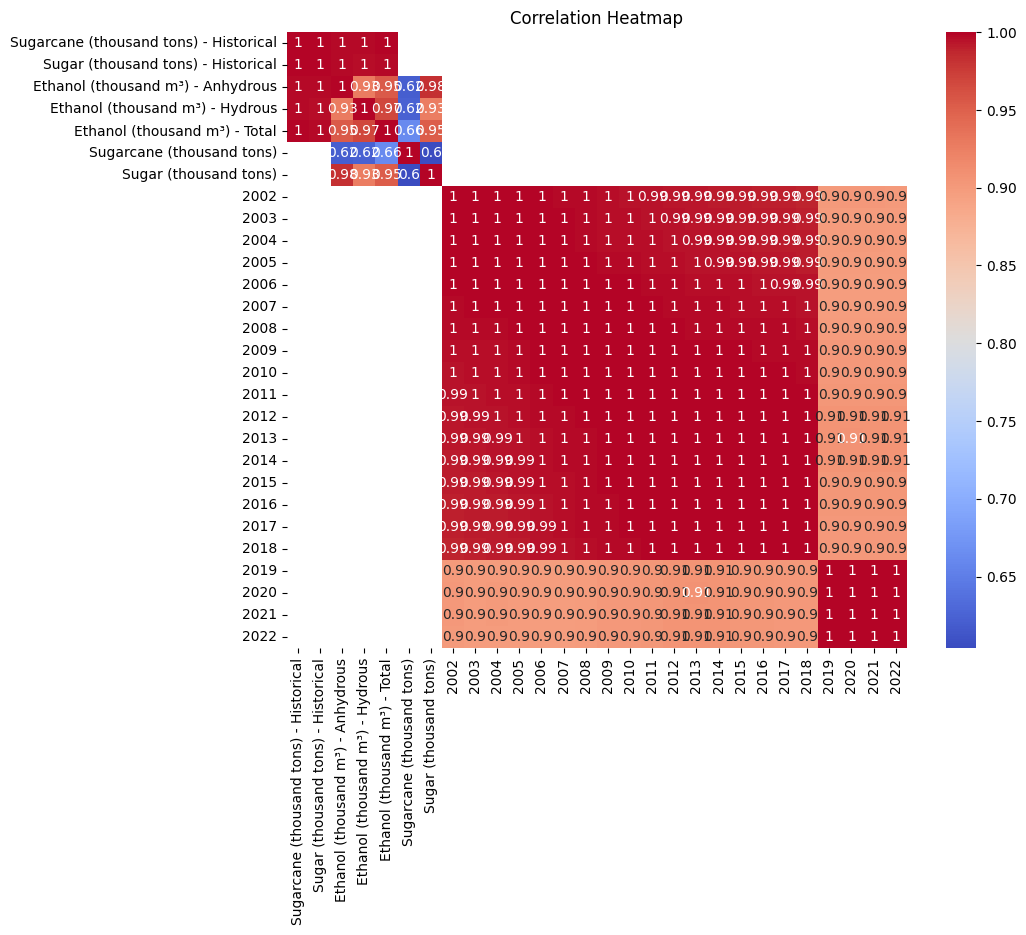

In [ ]:
import seaborn as sns

# Select only numeric columns for the correlation matrix
numeric_data = consolidated_new_data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Assuming the relevant column for ethanol demand is 'Etanol (mil m³)_Total'
ethanol_data = consolidated_new_data[['Ethanol (thousand m³) - Total']].dropna()

#Outlier Detection

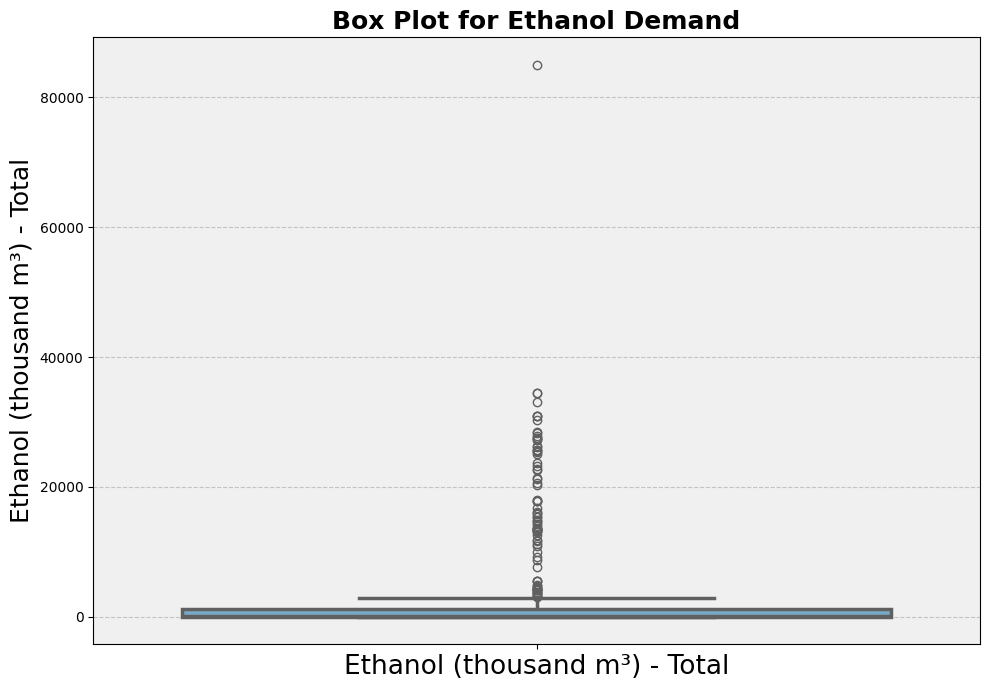

In [ ]:
# Box plot for ethanol demand
plt.figure(figsize=(10, 7))
sns.boxplot(data=ethanol_data, palette='Blues', linewidth=2.5)
plt.title('Box Plot for Ethanol Demand', fontsize=18, fontweight='bold')
plt.ylabel('Ethanol (thousand m³) - Total', fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f0f0f0')  # Light gray background
plt.xticks(fontsize='19')
plt.tight_layout()
plt.show()

In [ ]:
consolidated_new_data.describe()

,Sugarcane (thousand tons) - Historical,Sugar (thousand tons) - Historical,Ethanol (thousand m³) - Anhydrous,Ethanol (thousand m³) - Hydrous,Ethanol (thousand m³) - Total,Sugarcane (thousand tons),Sugar (thousand tons),2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,29.000000,29.000000,580.000000,580.000000,580.000000,5.510000e+02,551.000000,6.000000e+01,6.000000e+01,6.000000e+01,...,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01
mean,33170.697517,2334.544138,1020.934081,1712.341183,2754.399347,7.375625e+04,3494.702303,5.153530e+05,5.374118e+05,5.632721e+05,...,1.019410e+06,1.043698e+06,1.014560e+06,1.023330e+06,1.021123e+06,1.005297e+06,6.830051e+05,6.813016e+05,6.840785e+05,6.855798e+05
std,81402.246545,5775.131567,2666.801060,4832.101594,7326.914749,3.908783e+05,8960.222519,1.218277e+06,1.277374e+06,1.341077e+06,...,2.512830e+06,2.580871e+06,2.528423e+06,2.555442e+06,2.564293e+06,2.528183e+06,1.970395e+06,1.966272e+06,1.970682e+06,1.973373e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,8.500000e+01,9.300000e+01,9.300000e+01,...,1.330000e+02,1.410000e+02,1.350000e+02,1.320000e+02,8.600000e+01,1.600000e+02,8.700000e+01,9.200000e+01,7.500000e+01,7.900000e+01
25%,102.999000,0.000000,0.000000,5.111750,7.778250,1.896370e+02,0.503500,7.105000e+03,7.293500e+03,7.265750e+03,...,1.380100e+04,1.335000e+04,1.330100e+04,1.335900e+04,1.259600e+04,1.170800e+04,9.993750e+03,1.011925e+04,9.842250e+03,9.920500e+03
50%,2681.857000,142.865000,79.294000,68.643000,149.500000,2.481000e+03,118.210000,4.836550e+04,5.352900e+04,5.623050e+04,...,7.099600e+04,7.109800e+04,6.808700e+04,5.946050e+04,5.184050e+04,5.305900e+04,5.935650e+04,5.492100e+04,5.678500e+04,5.594950e+04
75%,14891.497000,1093.233000,402.006250,718.840000,1230.805500,2.808527e+04,1661.369000,2.779170e+05,3.030430e+05,3.346605e+05,...,6.426860e+05,6.398990e+05,5.457622e+05,6.522628e+05,6.222028e+05,6.131495e+05,3.390458e+05,3.386300e+05,3.354805e+05,3.386890e+05
max,320650.076000,22567.260000,21000.000000,48500.000000,85000.000000,6.440000e+06,67500.000000,5.206656e+06,5.377216e+06,5.633700e+06,...,1.022304e+07,1.045428e+07,1.017983e+07,1.024270e+07,1.023326e+07,1.006374e+07,9.983951e+06,9.975836e+06,1.005241e+07,1.003585e+07


#Ethanol Demand Over Time

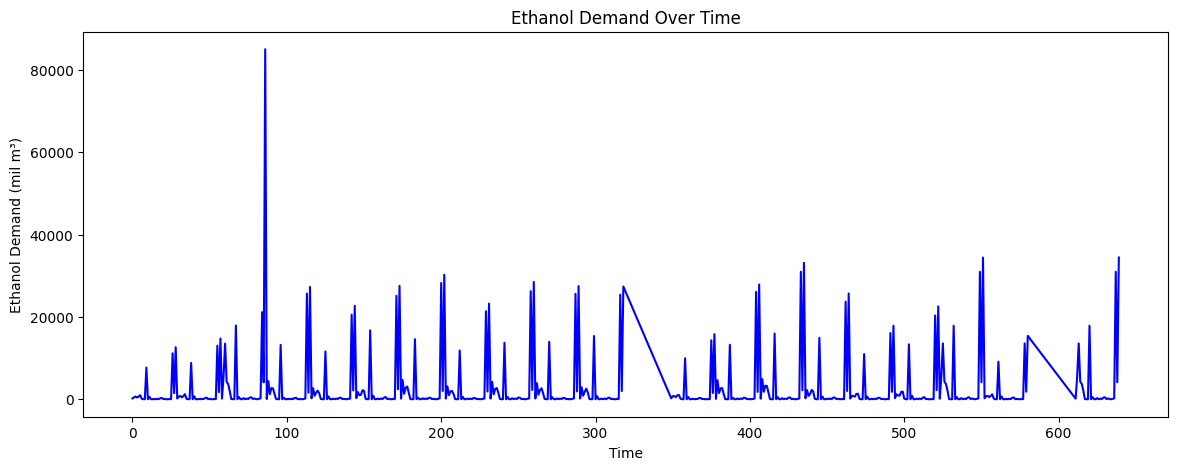

In [ ]:
# Plot ethanol demand over time
plt.figure(figsize=(14, 5))
plt.plot(ethanol_data.index, ethanol_data['Ethanol (thousand m³) - Total'], color='blue')
plt.title('Ethanol Demand Over Time')
plt.xlabel('Time')
plt.ylabel('Ethanol Demand (mil m³)')
plt.show()

In [ ]:
# Generate a date range assuming monthly data starting from 2002
date_range = pd.date_range(start='2002-01-01', periods=len(ethanol_data), freq='M')
ethanol_data['date'] = date_range
ethanol_data.set_index('date', inplace=True)

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ethanol_data.values)


In [ ]:
# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [ ]:
seq_length = 12  # Example sequence length (1 year)
X, y = create_sequences(scaled_data, seq_length)

# Split into train and test sets

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Build the LSTM model

In [ ]:
from tensorflow.keras.layers import Input
model = Sequential()
model.add(Input(shape=(seq_length, 1)))
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [ ]:
# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
408/408 - 8s - 19ms/step - loss: 0.0083 - val_loss: 0.0052
Epoch 2/100
408/408 - 4s - 9ms/step - loss: 0.0079 - val_loss: 0.0056
Epoch 3/100
408/408 - 5s - 11ms/step - loss: 0.0083 - val_loss: 0.0049
Epoch 4/100
408/408 - 7s - 16ms/step - loss: 0.0079 - val_loss: 0.0049
Epoch 5/100
408/408 - 3s - 8ms/step - loss: 0.0079 - val_loss: 0.0050
Epoch 6/100
408/408 - 3s - 8ms/step - loss: 0.0078 - val_loss: 0.0050
Epoch 7/100
408/408 - 3s - 8ms/step - loss: 0.0080 - val_loss: 0.0052
Epoch 8/100
408/408 - 6s - 14ms/step - loss: 0.0080 - val_loss: 0.0048
Epoch 9/100
408/408 - 3s - 8ms/step - loss: 0.0078 - val_loss: 0.0048
Epoch 10/100
408/408 - 3s - 8ms/step - loss: 0.0079 - val_loss: 0.0048
Epoch 11/100
408/408 - 4s - 10ms/step - loss: 0.0078 - val_loss: 0.0048
Epoch 12/100
408/408 - 4s - 9ms/step - loss: 0.0078 - val_loss: 0.0047
Epoch 13/100
408/408 - 4s - 11ms/step - loss: 0.0078 - val_loss: 0.0048
Epoch 14/100
408/408 - 6s - 15ms/step - loss: 0.0077 - val_loss: 0.0050
Epoch 15

# Evaluate the model

In [ ]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 731ms/step


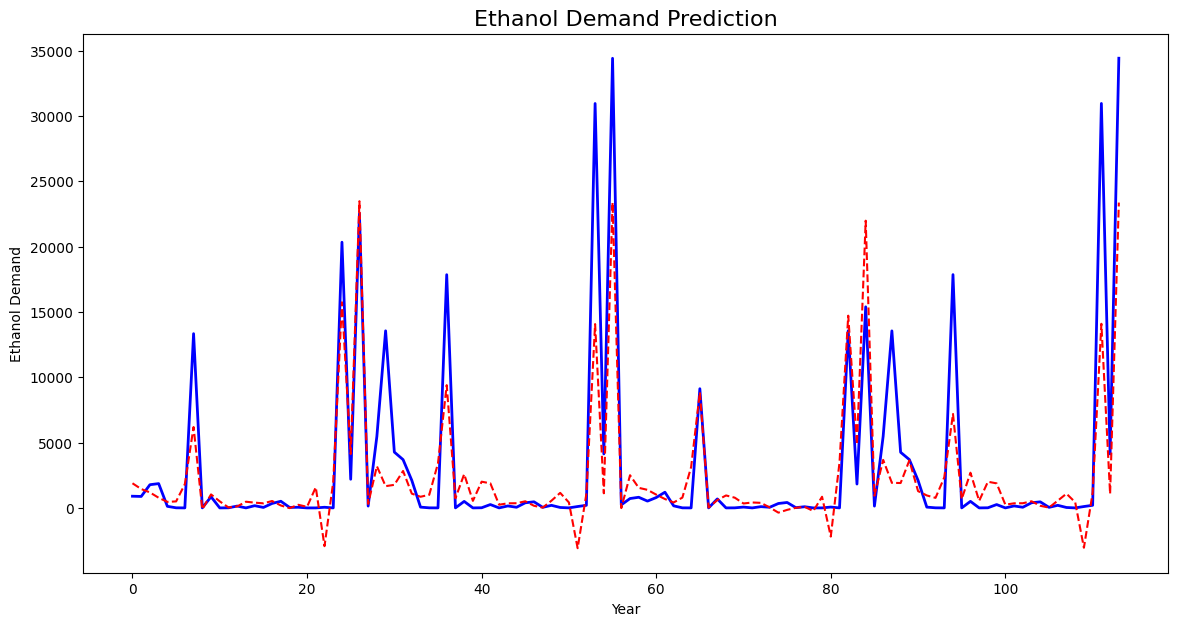

In [ ]:
plt.figure(figsize=(14, 7))

# Plot actual ethanol demand
plt.plot(y_test, color='blue', label='Actual Ethanol Demand', linewidth=2)

# Plot predicted ethanol demand
plt.plot(predicted, color='red', label='Predicted Ethanol Demand', linestyle='--')

# Enhancements
plt.title('Ethanol Demand Prediction', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Ethanol Demand')
plt.show()



#Residual Plot

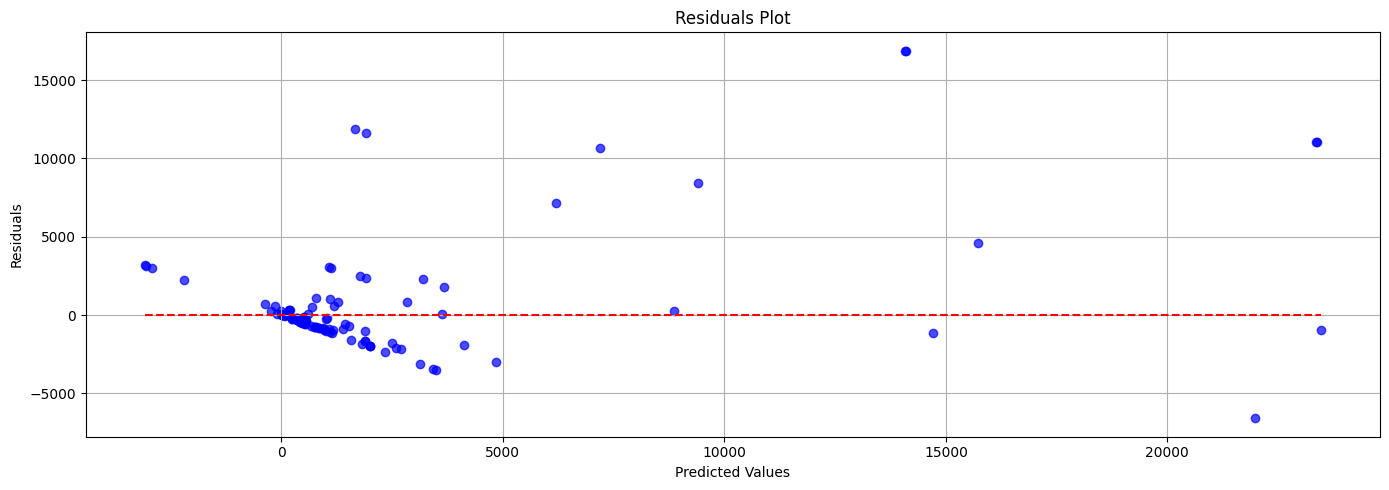

In [ ]:
# Calculate residuals
residuals = y_test - predicted

# Residual plot
plt.figure(figsize=(14, 5))
plt.scatter(predicted, residuals, color='blue', alpha=0.7)
plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max(), colors='red', linestyles='dashed')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#Predicted vs. Actual Scatter Plot

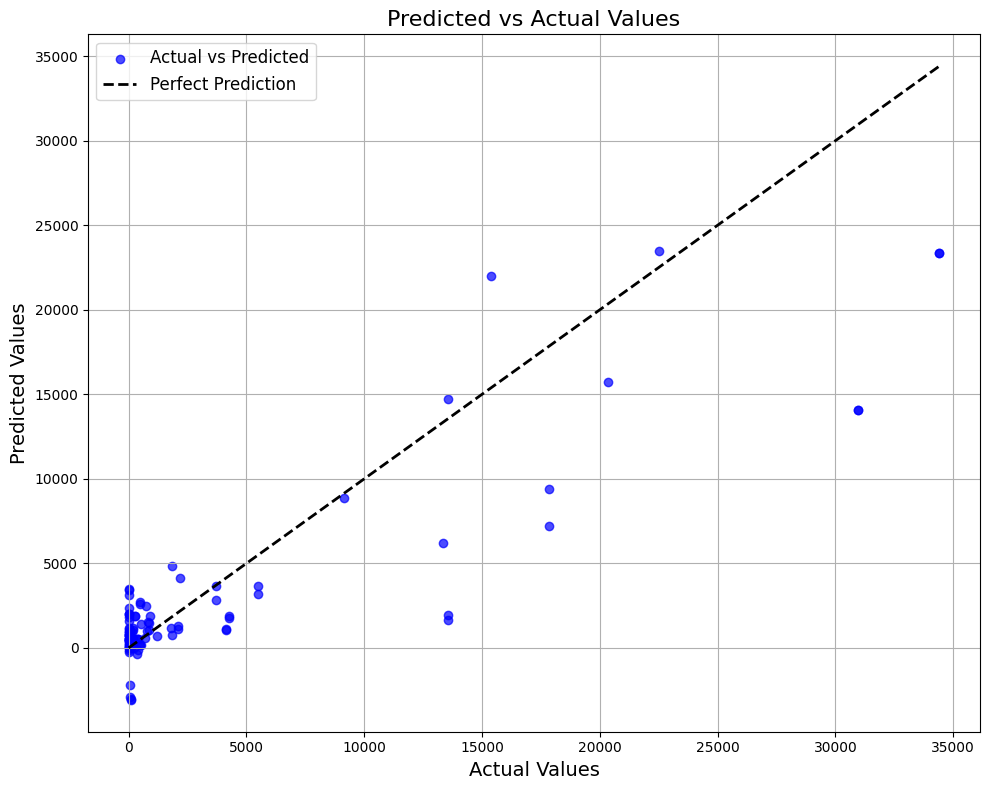

In [ ]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predicted, color='blue', alpha=0.7, label='Actual vs Predicted')

# Plotting the diagonal line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')

# Enhancements
plt.title('Predicted vs Actual Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)  # Add grid for better readability

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


*   The primary goal of this project is to predict future ethanol demand based on historical data.
*   The LSTM model is trained to understand the patterns in the data and make predictions accordingly.
*   The plots of training/validation loss and residuals help in evaluating the model's performance and understanding how well it generalizes to new data.





#Model Loss Over Epochs

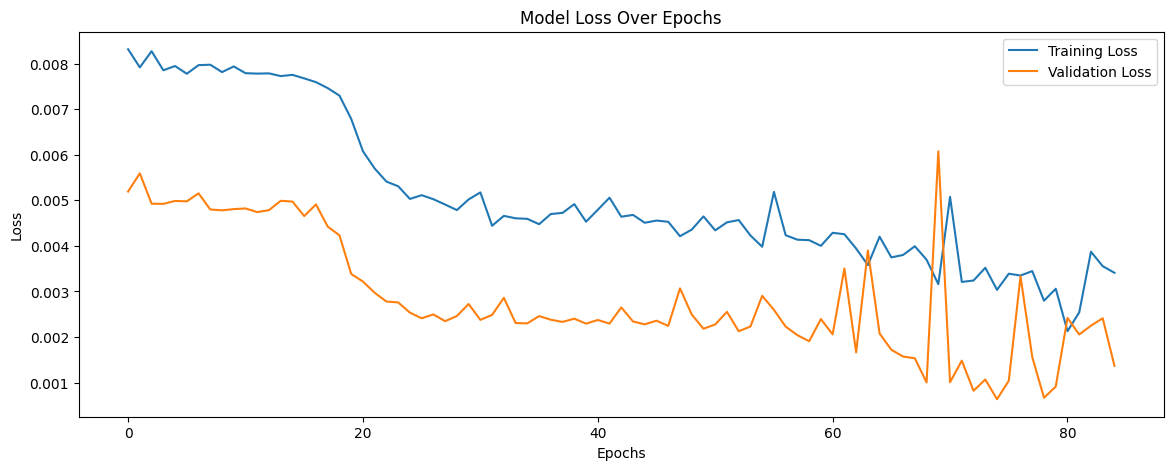

In [ ]:
# Plot training and validation loss over epochs
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(y_test, predicted)
print('MAE:', mae)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE:', rmse)

# Calculate MAPE

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Create a mask for non-zero values
    non_zero_mask = y_true != 0
    if np.any(non_zero_mask):
        return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100
    else:
        return np.nan

mape = mean_absolute_percentage_error(y_test, predicted)
print('MAPE:', mape)

MAE: 1885.2560368927404
RMSE: 3717.443920383336
MAPE: 5971.222166326015
